Aim:

PERFORM NAÏVE BAYES ON A DATASET AND ANALYSE ITS PERFORMANCE

Algorithm:

Naive Bayes is a probabilistic classifier based on Bayes' Theorem, which assumes that the features are conditionally independent given the class label. The goal is to predict the class label C for a given data point X.The Naive Bayes classifier assumes that the features are independent.

Code:


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
iris = datasets.load_iris()

# iris_df = pd.DataFrame(data = iris.data , columns = iris.feature_names)
X = iris.data 
# iris_df["species"] = iris.target
y = iris.target 

# iris_df
type(X)

numpy.ndarray

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

Output:


In [4]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Naive Bayes classifier on Iris dataset: {accuracy:.2f}")

Accuracy of Naive Bayes classifier on Iris dataset: 0.98


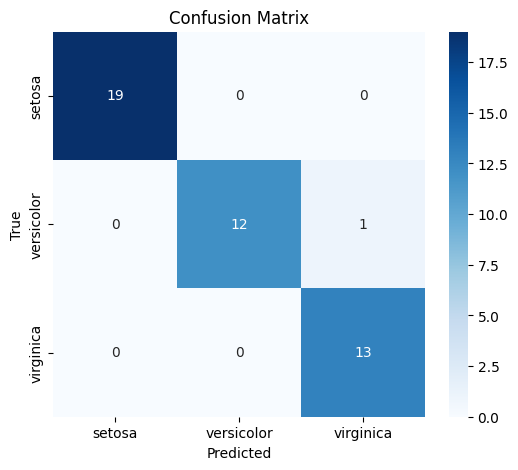

In [5]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes using formulas

In [6]:
import numpy as np 
import pandas as pd 	
import matplotlib.pyplot as plt 
from sklearn import datasets
import math


def accuracy_score(y_true, y_pred):
	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)

def pre_processing(df):
	X = df.drop([df.columns[-1]], axis = 1)
	y = df[df.columns[-1]]

	return X, y



class  NaiveBayes:

	def __init__(self):
		self.features = list
		self.likelihoods = {}
		self.class_priors = {}
		self.pred_priors = {}

		self.X_train = np.array
		self.y_train = np.array
		self.train_size = int
		self.num_feats = int

	def fit(self, X, y):

		self.features = list(X.columns)
		self.X_train = X
		self.y_train = y
		self.train_size = X.shape[0]
		self.num_feats = X.shape[1]

		for feature in self.features:
			self.likelihoods[feature] = {}
			self.pred_priors[feature] = {}

			for feat_val in np.unique(self.X_train[feature]):
				self.pred_priors[feature].update({feat_val: 0})

				for outcome in np.unique(self.y_train):
					self.likelihoods[feature].update({str(feat_val)+'_'+str(outcome):0})
					self.class_priors.update({outcome: 0})

		self._calc_class_prior()
		self._calc_likelihoods()
		self._calc_predictor_prior()

	def _calc_class_prior(self):
		for outcome in np.unique(self.y_train):
			outcome_count = sum(self.y_train == outcome)
			self.class_priors[outcome] = outcome_count / self.train_size

	def _calc_likelihoods(self):

		for feature in self.features:

			for outcome in np.unique(self.y_train):
				outcome_count = sum(self.y_train == outcome)
				feat_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()

				for feat_val, count in feat_likelihood.items():
					self.likelihoods[feature][str(feat_val) + '_' + str(outcome)] = count/outcome_count


	def _calc_predictor_prior(self):
		for feature in self.features:
			feat_vals = self.X_train[feature].value_counts().to_dict()

			for feat_val, count in feat_vals.items():
				self.pred_priors[feature][feat_val] = count/self.train_size


	def predict(self, X):
		results = []
		X = np.array(X)

		for query in X:
			probs_outcome = {}
			for outcome in np.unique(self.y_train):
				prior = self.class_priors[outcome]
				likelihood = 1
				evidence = 1

				for feat, feat_val in zip(self.features, query):
					likelihood *= self.likelihoods[feat][str(feat_val) + '_' + str(outcome)]
					evidence *= self.pred_priors[feat][feat_val]

				posterior = (likelihood * prior) / (evidence)

				probs_outcome[outcome] = posterior

			result = max(probs_outcome, key = lambda x: probs_outcome[x])
			results.append(result)

		return np.array(results)

			

if __name__ == "__main__":


	iris = datasets.load_iris()

	df = pd.DataFrame(data = iris.data , columns = iris.feature_names)
	print(df)

	X,y  = pre_processing(df)
	X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

	nb_clf = NaiveBayes()
	nb_clf.fit(X, y)

	print("Train Accuracy: {}".format(accuracy_score(y, nb_clf.predict(X))))
	print("Test Accuracy: {}".format(accuracy_score(y_test, nb_clf.predict(X_test))))


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
Train Accuracy: 86.67
Test Accuracy: 84.

Result:

Naive Bayes has been performed using the library functions and using formulas.The NaiveBayes sklearn library function is highly optimized
